# Analysis of Calendar Effect of Stock Market:


Purpose: 
This project focuses on the calendar effect of stock market. As most main stock markets of US rises to an all-time high recently, people would concern about the risk. Some researchers believe that the behaviour of stock market is related to the calendar.

This project combines several indeces of stock market and money market to one single table, analyze the connections between the price/index/amount and the calendar using the skills learned from the Database course.

Dataset in this research:

DJI:Dow Jones Industrial Average, Frequency:  daily

https://finance.yahoo.com/quote/%5EDJI/history?p=%5EDJI

TNX:Treasury Yield 10 Years, Frequency:  daily

https://finance.yahoo.com/quote/%5ETNX/history?p=%5ETNX

IXIC:NASDAQ Composite, Frequency:  daily

https://finance.yahoo.com/quote/%5EIXIC/history?p=%5EIXIC

GSPC:S&P 500, Frequency:  daily

https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC

M1:includes funds that are readily accessible for spending, Frequency:  Weekly

https://fred.stlouisfed.org/series/M1


In [1]:
import sqlite3

conn = sqlite3.connect('stock.db')

cur = conn.cursor()

cur.execute('DROP TABLE IF EXISTS dji')
cur.execute('DROP TABLE IF EXISTS tnx')
cur.execute('DROP TABLE IF EXISTS ixic')
cur.execute('DROP TABLE IF EXISTS gspc')
cur.execute('DROP TABLE IF EXISTS m1')
# cur.execute('DROP TABLE IF EXISTS dfc')

In [2]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

**Read the data and observe the data**

In [3]:
df_dji = pd.read_csv("^DJI.csv") # Dow Jones Industrial Average (^DJI), https://finance.yahoo.com/quote/%5EDJI/history?p=%5EDJI

In [4]:
df_dji.dropna()
df_dji

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/29/1985,1277.719971,1295.489990,1266.890015,1292.619995,1292.619995,13560000
1,1/30/1985,1297.369995,1305.099976,1278.930054,1287.880005,1287.880005,16820000
2,1/31/1985,1283.239990,1293.400024,1272.640015,1286.770020,1286.770020,14070000
3,2/1/1985,1276.939941,1286.109985,1269.770020,1277.719971,1277.719971,10980000
4,2/4/1985,1272.079956,1294.939941,1268.989990,1290.079956,1290.079956,11630000
...,...,...,...,...,...,...,...
9029,11/23/2020,29332.820310,29667.750000,29332.820310,29591.269530,29591.269530,387200000
9030,11/24/2020,29746.109380,30116.509770,29746.109380,30046.240230,30046.240230,432760000
9031,11/25/2020,30058.869140,30058.869140,29806.250000,29872.470700,29872.470700,323030000
9032,11/27/2020,29911.330080,30015.130860,29819.980470,29910.369140,29910.369140,177040000


In [5]:
df_dji.shape

(9034, 7)

In [6]:
df_dji.to_sql('dji', conn) 

In [7]:
pd.read_sql_query('select * from dji',conn)

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,1/29/1985,1277.719971,1295.489990,1266.890015,1292.619995,1292.619995,13560000
1,1,1/30/1985,1297.369995,1305.099976,1278.930054,1287.880005,1287.880005,16820000
2,2,1/31/1985,1283.239990,1293.400024,1272.640015,1286.770020,1286.770020,14070000
3,3,2/1/1985,1276.939941,1286.109985,1269.770020,1277.719971,1277.719971,10980000
4,4,2/4/1985,1272.079956,1294.939941,1268.989990,1290.079956,1290.079956,11630000
...,...,...,...,...,...,...,...,...
9029,9029,11/23/2020,29332.820310,29667.750000,29332.820310,29591.269530,29591.269530,387200000
9030,9030,11/24/2020,29746.109380,30116.509770,29746.109380,30046.240230,30046.240230,432760000
9031,9031,11/25/2020,30058.869140,30058.869140,29806.250000,29872.470700,29872.470700,323030000
9032,9032,11/27/2020,29911.330080,30015.130860,29819.980470,29910.369140,29910.369140,177040000


In [8]:
pd.read_sql_query('select count(*),max("Adj Close"),min("Adj Close") from dji',conn)

,count(*),"max(""Adj Close"")","min(""Adj Close"")"
0,9034,30046.24023,1242.050049


In [9]:
df_dji.groupby('Date').agg({'Adj Close': [ 'max', 'min' ,'mean']}) 


Adj Close                            
                    max           min          mean
Date                                               
1/10/1986   1513.530029   1513.530029   1513.530029
1/10/1989   2193.209961   2193.209961   2193.209961
1/10/1990   2750.639893   2750.639893   2750.639893
1/10/1991   2498.760010   2498.760010   2498.760010
1/10/1992   3199.500000   3199.500000   3199.500000
...                 ...           ...           ...
9/9/2014   17013.869140  17013.869140  17013.869140
9/9/2015   16253.570310  16253.570310  16253.570310
9/9/2016   18085.449220  18085.449220  18085.449220
9/9/2019   26835.509770  26835.509770  26835.509770
9/9/2020   27940.470700  27940.470700  27940.470700

[9034 rows x 3 columns]

In [10]:
pd.read_sql_query('''
select max("Adj Close"),min("Adj Close"),avg("Adj Close") 
from dji
group by "date"
''',conn)

,"max(""Adj Close"")","min(""Adj Close"")","avg(""Adj Close"")"
0,1513.530029,1513.530029,1513.530029
1,2193.209961,2193.209961,2193.209961
2,2750.639893,2750.639893,2750.639893
3,2498.760010,2498.760010,2498.760010
4,3199.500000,3199.500000,3199.500000
...,...,...,...
9029,17013.869140,17013.869140,17013.869140
9030,16253.570310,16253.570310,16253.570310
9031,18085.449220,18085.449220,18085.449220
9032,26835.509770,26835.509770,26835.509770


In [11]:
df_dji.agg({'Adj Close': [ 'max', 'min' ,'mean']}) 

,Adj Close
max,30046.240230
min,1242.050049
mean,10257.475069


In [12]:
pd.read_sql_query('''
select max("Adj Close"),min("Adj Close"),avg("Adj Close") 
from dji
''',conn)

,"max(""Adj Close"")","min(""Adj Close"")","avg(""Adj Close"")"
0,30046.24023,1242.050049,10257.475069


In [13]:
df_tnx = pd.read_csv("^TNX.csv") # Treasury Yield 10 Years (^TNX), https://finance.yahoo.com/quote/%5ETNX/history?p=%5ETNX

In [14]:
df_tnx.dropna()
df_tnx

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/1962,4.060,4.060,4.060,4.060,4.060,0.0
1,1/3/1962,4.030,4.030,4.030,4.030,4.030,0.0
2,1/4/1962,3.990,3.990,3.990,3.990,3.990,0.0
3,1/5/1962,4.020,4.020,4.020,4.020,4.020,0.0
4,1/7/1962,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
18315,11/24/2020,0.873,0.888,0.865,0.882,0.882,0.0
18316,11/25/2020,0.880,0.885,0.855,0.878,0.878,0.0
18317,11/27/2020,NaN,NaN,NaN,NaN,NaN,NaN
18318,11/29/2020,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_tnx.shape

(18320, 7)

In [16]:
df_tnx.to_sql('tnx', conn) 
pd.read_sql_query('select count(*) from tnx',conn)

,count(*)
0,18320


In [17]:
df_ixic = pd.read_csv("^IXIC.csv") # NASDAQ Composite (^IXIC), https://finance.yahoo.com/quote/%5EIXIC/history?p=%5EIXIC

In [18]:
df_ixic.dropna()
df_ixic

,Date,Open,High,Low,Close,Adj Close,Volume
0,2/5/1971,100.000000,100.000000,100.000000,100.000000,100.000000,0
1,2/8/1971,100.839996,100.839996,100.839996,100.839996,100.839996,0
2,2/9/1971,100.760002,100.760002,100.760002,100.760002,100.760002,0
3,2/10/1971,100.690002,100.690002,100.690002,100.690002,100.690002,0
4,2/11/1971,101.449997,101.449997,101.449997,101.449997,101.449997,0
...,...,...,...,...,...,...,...
12561,11/23/2020,11916.759770,11949.330080,11796.530270,11880.629880,11880.629880,5360830000
12562,11/24/2020,11939.330080,12049.879880,11863.450200,12036.790040,12036.790040,6277790000
12563,11/25/2020,12053.889650,12114.769530,12020.950200,12094.400390,12094.400390,4425030000
12564,11/27/2020,12159.179690,12236.230470,12154.570310,12205.849610,12205.849610,3401890000


In [19]:
df_ixic.shape

(12566, 7)

In [20]:
df_ixic.to_sql('ixic', conn) 
pd.read_sql_query('select count(*),max("Adj Close"),min("Adj Close") from ixic',conn)

,count(*),"max(""Adj Close"")","min(""Adj Close"")"
0,12566,12205.84961,54.869999


In [21]:
df_gspc = pd.read_csv("^GSPC.csv") # S&P 500 (^GSPC), https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC

In [22]:
df_gspc.shape

(23340, 7)

In [23]:
df_gspc.dropna()
df_gspc.shape

(23340, 7)

In [24]:
# by SQL way
cur.execute('DROP TABLE IF EXISTS gspc')
df_gspc.to_sql('gspc', conn) 
pd.read_sql_query('select count(*),max("Adj Close"),min("Adj Close") from gspc',conn)

,count(*),"max(""Adj Close"")","min(""Adj Close"")"
0,23340,3638.350098,4.4


In [25]:
# by SQL way
pd.read_sql_query('select count(*),max("Adj Close"),min("Adj Close") from gspc',conn)

,count(*),"max(""Adj Close"")","min(""Adj Close"")"
0,23340,3638.350098,4.4


In [26]:
# by SQL way

cur.execute('''
delete from gspc 
where Date IS NULL or Open IS NULL or High IS NULL or Low IS NULL or Close IS NULL or "Adj Close" IS NULL or Volume IS NULL 
''')

In [27]:
pd.read_sql_query('select count(*),max("Adj Close"),min("Adj Close") from gspc',conn)

,count(*),"max(""Adj Close"")","min(""Adj Close"")"
0,23340,3638.350098,4.4


In [28]:
df_m1=pd.read_csv("M1.csv") # M1 includes funds that are readily accessible for spending, https://fred.stlouisfed.org/series/M1
df_m1 # frequency of this dataset is weekly!

,DATE,M1
0,1975-01-06,273.4
1,1975-01-13,273.7
2,1975-01-20,273.8
3,1975-01-27,273.7
4,1975-02-03,275.2
...,...,...
2391,2020-11-02,5635.4
2392,2020-11-09,5735.4
2393,2020-11-16,5733.4
2394,2020-11-23,6231.2


In [29]:
df_m1 = df_m1.rename(columns={"DATE":"Date"})
df_m1.dropna()
df_m1.shape

(2396, 2)

In [30]:
df_m1.to_sql('m1', conn) 
pd.read_sql_query('select count(*),max(M1),min(M1) from m1',conn)

,count(*),max(M1),min(M1)
0,2396,6542.7,273.4


In [31]:
# combine all of the adjusted close price of different stocks/index to one sigle table
dfc = pd.merge(df_dji, df_tnx,how='inner',on='Date')
dfc = dfc[['Date','Adj Close_x','Adj Close_y']]
dfc = dfc.rename(columns={"Adj Close_x": "DJI","Adj Close_y":"TNX"})
dfc = pd.merge(dfc, df_ixic,how='inner',on='Date')[['Date','DJI','TNX','Adj Close']].rename(columns={"Adj Close":"IXIC"})
dfc = pd.merge(dfc, df_gspc,how='inner',on='Date')[['Date','DJI','TNX','IXIC','Adj Close']].rename(columns={"Adj Close":"GSPC"})
dfc

,Date,DJI,TNX,IXIC,GSPC
0,1/29/1985,1292.619995,11.110,276.200012,179.179993
1,1/30/1985,1287.880005,11.080,278.600006,179.389999
2,1/31/1985,1286.770020,11.170,278.700012,179.630005
3,2/1/1985,1277.719971,11.290,278.399994,178.630005
4,2/4/1985,1290.079956,11.350,280.799988,180.350006
...,...,...,...,...,...
9027,11/23/2020,29591.269530,0.857,11880.629880,3577.590088
9028,11/24/2020,30046.240230,0.882,12036.790040,3635.409912
9029,11/25/2020,29872.470700,0.878,12094.400390,3629.649902
9030,11/27/2020,29910.369140,NaN,12205.849610,3638.350098


In [32]:
dfc.shape

(9032, 5)

In [33]:
# by SQL way

cur.execute('DROP TABLE IF EXISTS dfc')
cur.execute('''
create table dfc as 
select dji.Date as Date,dji."Adj Close" as DJI,tnx."Adj Close" as TNX,ixic."Adj Close" as IXIC,gspc."Adj Close" as GSPC
from dji,tnx,ixic,gspc
where dji.Date=tnx.Date and tnx.Date=ixic.Date and ixic.Date=gspc.Date
''')
pd.read_sql_query('''
select * from dfc
''',conn)


,Date,DJI,TNX,IXIC,GSPC
0,1/29/1985,1292.619995,11.110,276.200012,179.179993
1,1/30/1985,1287.880005,11.080,278.600006,179.389999
2,1/31/1985,1286.770020,11.170,278.700012,179.630005
3,2/1/1985,1277.719971,11.290,278.399994,178.630005
4,2/4/1985,1290.079956,11.350,280.799988,180.350006
...,...,...,...,...,...
9027,11/23/2020,29591.269530,0.857,11880.629880,3577.590088
9028,11/24/2020,30046.240230,0.882,12036.790040,3635.409912
9029,11/25/2020,29872.470700,0.878,12094.400390,3629.649902
9030,11/27/2020,29910.369140,NaN,12205.849610,3638.350098


In [34]:
# by SQL way

cur.execute('''
update dfc
set DJI=100*DJI/(select D2.DJI from dfc D2 where D2.Date==(select min(D3.Date) from dfc D3))
''')
cur.execute('''
update dfc
set TNX=100*TNX/(select D2.TNX from dfc D2 where D2.Date==(select min(D3.Date) from dfc D3))
''')
cur.execute('''
update dfc
set IXIC=100*IXIC/(select D2.IXIC from dfc D2 where D2.Date==(select min(D3.Date) from dfc D3))
''')
cur.execute('''
update dfc
set GSPC=100*GSPC/(select D2.GSPC from dfc D2 where D2.Date==(select min(D3.Date) from dfc D3))
''')
pd.read_sql_query('''
select * from dfc
''',conn)

,Date,DJI,TNX,IXIC,GSPC
0,1/29/1985,85.404318,118.317359,85.141806,86.997469
1,1/30/1985,85.091143,117.997870,85.881631,87.099433
2,1/31/1985,85.017806,118.956337,85.912459,87.215964
3,2/1/1985,84.419863,120.234292,85.819975,86.730433
4,2/4/1985,85.236496,120.873269,86.559801,87.565547
...,...,...,...,...,...
9027,11/23/2020,1955.116117,9.126731,3662.339735,1737.031446
9028,11/24/2020,1985.176353,9.392971,3710.477886,1765.104772
9029,11/25/2020,1973.695277,9.350373,3728.236934,1762.308108
9030,11/27/2020,1976.199254,NaN,3762.592428,1766.532324


In [35]:
# set index = 100 on the first day
dfc['DJI'] = dfc['DJI']/dfc['DJI'][0]*100
dfc['DJI']

0        100.000000
1         99.633304
2         99.547433
3         98.847301
4         99.803497
           ...     
9027    2289.247392
9028    2324.444953
9029    2311.001750
9030    2313.933658
9031    2292.912128
Name: DJI, Length: 9032, dtype: float64

In [36]:
dfc['TNX'] = dfc['TNX']/dfc['TNX'][0]*100
dfc['IXIC'] = dfc['IXIC']/dfc['IXIC'][0]*100
dfc['GSPC'] = dfc['GSPC']/dfc['GSPC'][0]*100

In [37]:
dfc[dfc['DJI']==dfc['DJI'].max()]['Date']

9028    11/24/2020
Name: Date, dtype: object

In [38]:
dfc.reset_index(inplace=True)
dfc = dfc.dropna()
dfc

,index,Date,DJI,TNX,IXIC,GSPC
0,0,1/29/1985,100.000000,100.000000,100.000000,100.000000
1,1,1/30/1985,99.633304,99.729973,100.868933,100.117204
2,2,1/31/1985,99.547433,100.540054,100.905141,100.251151
3,3,2/1/1985,98.847301,101.620162,100.796518,99.693053
4,4,2/4/1985,99.803497,102.160216,101.665451,100.652982
...,...,...,...,...,...,...
9026,9026,11/20/2020,2263.888891,7.461746,4292.168434,1985.456065
9027,9027,11/23/2020,2289.247392,7.713771,4301.458857,1996.645958
9028,9028,11/24/2020,2324.444953,7.938794,4357.997653,2028.915088
9029,9029,11/25/2020,2311.001750,7.902790,4378.855852,2025.700437


In [39]:
dfc.describe()

,index,DJI,TNX,IXIC,GSPC
count,8958.000000,8958.000000,8958.000000,8958.000000,8958.000000
mean,4518.009600,793.832947,44.957796,922.740025,657.149019
std,2605.579301,536.239623,21.830435,833.585070,433.707206
min,0.000000,96.087795,4.491449,100.000000,98.521044
25%,2265.250000,285.352422,25.562556,266.765017,255.138698
50%,4517.500000,783.212390,42.655266,725.295050,628.225813
75%,6773.750000,1010.197521,61.206121,1129.329226,812.476320
max,9031.000000,2324.444953,108.190819,4416.632766,2028.915088


In [40]:
from matplotlib import pyplot as plt
width = 20
height = 7

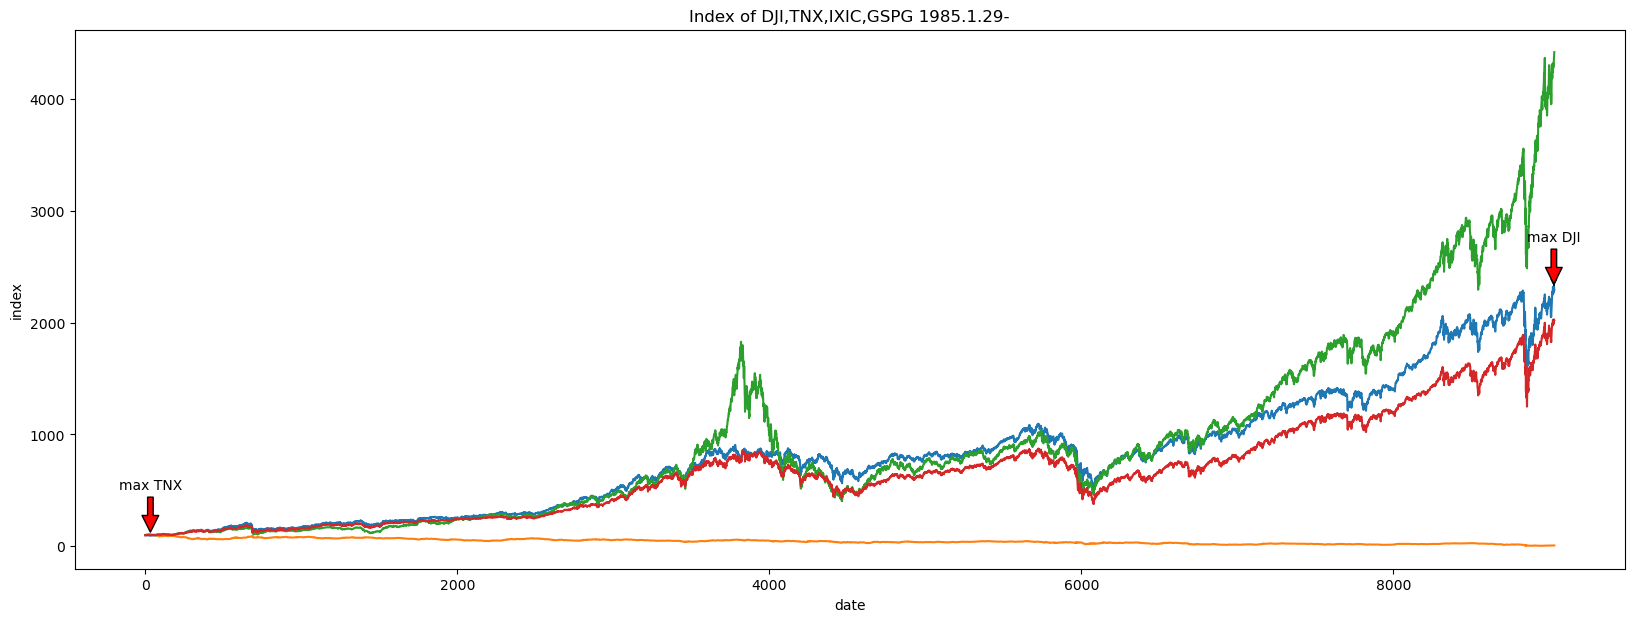

In [41]:
# combine dataframe in the python pyplot code
# draw graph of the indeces
plt.figure(figsize=(width,height))
plt.ylim(-200, max(dfc['DJI'].max(),dfc['IXIC'].max())+200)
plt.plot(dfc.index, dfc['DJI'])
plt.plot(dfc.index, dfc['TNX'])
plt.plot(dfc.index, dfc['IXIC'])
plt.plot(dfc.index, dfc['GSPC'])
plt.annotate("",
    xy=(dfc[dfc['DJI']==dfc['DJI'].max()]['index'], dfc['DJI'].max()), xycoords='data',
    xytext=(dfc[dfc['DJI']==dfc['DJI'].max()]['index'], dfc['DJI'].max() + 10), textcoords='data',
    arrowprops=dict(arrowstyle="->",connectionstyle="arc3"),
)
plt.annotate('max DJI', 
    xy=(dfc[dfc['DJI']==dfc['DJI'].max()]['index'], dfc['DJI'].max()), xycoords='data',
    xytext=(dfc[dfc['DJI']==dfc['DJI'].max()]['index'], dfc['DJI'].max() + 500), textcoords='data',
    arrowprops=dict(facecolor='red', shrink=0.05),
    horizontalalignment='center', verticalalignment='top',
    )
plt.annotate('max TNX', 
    xy=(dfc[dfc['TNX']==dfc['TNX'].max()]['index'], dfc['TNX'].max()), xycoords='data',
    xytext=(dfc[dfc['TNX']==dfc['TNX'].max()]['index'], dfc['TNX'].max() + 500), textcoords='data',
    arrowprops=dict(facecolor='red', shrink=0.05),
    horizontalalignment='center', verticalalignment='top',
    )

plt.xlabel("date")
plt.ylabel("index")
plt.title("Index of DJI,TNX,IXIC,GSPG 1985.1.29-")
plt.savefig('Index_DJI_NX_IXIC_GSPG.png', bbox_inches = 'tight',dpi=100)
plt.show()

Populating the interactive namespace from numpy and matplotlib


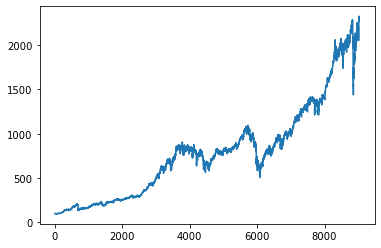

In [42]:
# second way to draw a simple graph
import seaborn
%pylab inline
plot(dfc.index,dfc.DJI)

In [43]:
dfc["Date"] = pd.to_datetime(dfc['Date'])
dfc['weekday'] = dfc['Date'].dt.day_name()
dfc['month'] = dfc['Date'].dt.month_name()
dfc['month_num'] = dfc['Date'].dt.month
dfc['weekday_num'] = dfc['Date'].dt.dayofweek
dfc['year'] = dfc['Date'].dt.year
dfc

,index,Date,DJI,TNX,IXIC,GSPC,weekday,month,month_num,weekday_num,year
0,0,1985-01-29,100.000000,100.000000,100.000000,100.000000,Tuesday,January,1,1,1985
1,1,1985-01-30,99.633304,99.729973,100.868933,100.117204,Wednesday,January,1,2,1985
2,2,1985-01-31,99.547433,100.540054,100.905141,100.251151,Thursday,January,1,3,1985
3,3,1985-02-01,98.847301,101.620162,100.796518,99.693053,Friday,February,2,4,1985
4,4,1985-02-04,99.803497,102.160216,101.665451,100.652982,Monday,February,2,0,1985
...,...,...,...,...,...,...,...,...,...,...,...
9026,9026,2020-11-20,2263.888891,7.461746,4292.168434,1985.456065,Friday,November,11,4,2020
9027,9027,2020-11-23,2289.247392,7.713771,4301.458857,1996.645958,Monday,November,11,0,2020
9028,9028,2020-11-24,2324.444953,7.938794,4357.997653,2028.915088,Tuesday,November,11,1,2020
9029,9029,2020-11-25,2311.001750,7.902790,4378.855852,2025.700437,Wednesday,November,11,2,2020



**Find out the rule of month of calendar effect on MONTH**
# get the date of the max/min of DJI/TNX/IXIC/GSPC/M1 each year
# get the month of these date
# count the numbers of the max/min in each month
# observe whether there are some months have most numbers of max/min values.




In [44]:
# get the min and max price(index/amount) of DJI in each year

result = dfc.groupby('year').agg({'DJI': [ 'max', 'min' ,'mean']}) 
print(result)

              DJI                          
              max          min         mean
year                                       
1985   120.151319    96.087795   103.335478
1986   151.287304   116.220548   138.766732
1987   210.612549   134.512850   176.306296
1988   168.920488   145.374512   159.478737
1989   215.494115   165.914182   194.206589
1990   232.067430   182.969481   207.382999
1991   245.147846   191.107987   226.626614
1992   264.052851   242.654462   254.120438
1993   293.537938   250.808437   272.709267
1994   307.774916   277.989673   293.497675
1995   403.557908   296.458363   347.615875
1996   507.566816   389.359592   444.002563
1997   638.958073   494.476352   576.075928
1998   725.214647   583.239456   667.830407
1999   889.443159   705.595609   810.790007
2000   906.916226   757.843010   830.048869
2001   877.127072   637.140815   789.780600
2002   822.766942   563.682292   712.881798
2003   808.738837   582.078266   696.773739
2004   839.731714   754.281248  

In [45]:
# Find the date of the highest point of DJI each year

dfc_dji_highest_date = dfc.groupby('year').apply(lambda t: t[t.DJI==t.DJI.max()])
dfc_dji_highest_date

index       Date          DJI        TNX         IXIC         GSPC  \
year                                                                            
1985 222     222 1985-12-16   120.151319  82.448245   117.740767   118.327945   
1986 465     465 1986-12-02   151.287304  63.726373   130.593771   141.756898   
1987 649     649 1987-08-25   210.612549  78.577858   164.771899   187.950665   
1988 943     943 1988-10-21   168.920488  79.477948   140.695145   158.310088   
1989 1185   1185 1989-10-06   215.494115  72.277228   175.090509   200.234408   
1990 1379   1379 1990-07-16   232.067430  75.967597   170.021718   205.910273   
     1380   1380 1990-07-17   232.067430  75.967597   168.175228   205.112180   
1991 1749   1749 1991-12-31   245.147846  60.396040   212.288198   232.777103   
1992 1854   1854 1992-06-01   264.052851  66.516652   213.023161   232.894299   
1993 2254   2254 1993-12-29   293.537938  51.251125   278.233145   262.629761   
1994 2277   2277 1994-01-31   307.774916  50.747075   289.815328   268.785581   
1995 2749   2749 1995-12-13   403.557908  51.593159   382.527152   346.963962   
1996 3012   3012 1996-12-27   507.566816  56.543654   467.552480   422.362991   
1997 3165   3165 1997-08-06   638.958073  55.850585   590.311322   535.952698   
1998 3493   3493 1998-11-23   725.214647  43.474347   715.937711   663.137631   
1999 3771   3771 1999-12-31   889.443159  57.920792  1473.320015   819.985521   
2000 3781   3781 2000-01-14   906.916226  60.072007  1471.495237   817.697333   
2001 4120   4120 2001-05-21   877.127072  48.478848   834.753797   732.687804   
2002 4324   4324 2002-03-19   822.766942  47.929793   680.981142   653.136558   
2003 4775   4775 2003-12-31   808.738837  38.316832   725.333059   620.560379   
2004 5024   5024 2004-12-28   839.731714  38.622862   788.265694   677.274298   
2005 5070   5070 2005-03-04   846.385624  38.793879   749.677776   682.062754   
2006 5528   5528 2006-12-27   967.845953  41.890189   880.238909   796.316565   
2007 5724   5724 2007-10-09  1095.800028  41.863186  1015.173711   873.507135   
2008 5866   5866 2008-05-02  1010.211837  34.608461   896.810240   789.094809   
2009 6285   6285 2009-12-30   816.056522  34.059406   829.572748   628.652801   
2010 6536   6536 2010-12-29   896.271133  30.072007   965.579224   703.080745   
2011 6620   6620 2011-04-29   991.052288  29.666967  1040.383749   761.028038   
2012 6983   6983 2012-10-05  1052.911950  15.589559  1135.477844   815.342176   
2013 7292   7292 2013-12-31  1282.407840  27.236724  1512.161355  1031.566055   
2014 7541   7541 2014-12-26  1396.675822  20.252025  1740.354690  1165.738420   
2015 7639   7639 2015-05-19  1416.687867  20.360036  1835.637062  1187.537762   
2016 8039   8039 2016-12-20  1545.281615  23.114311  1985.495910  1267.306674   
2017 8296   8296 2017-12-28  1921.485809  21.890189  2516.350418  1499.910785   
2018 8488   8488 2018-10-03  2075.504845  28.451845  2905.535661  1632.721355   
2019 8798   8798 2019-12-27  2216.061942  16.867687  3260.905042  1808.248770   
2020 9028   9028 2020-11-24  2324.444953   7.938794  4357.997653  2028.915088   

             weekday     month  month_num  weekday_num  year  
year                                                          
1985 222      Monday  December         12            0  1985  
1986 465     Tuesday  December         12            1  1986  
1987 649     Tuesday    August          8            1  1987  
1988 943      Friday   October         10            4  1988  
1989 1185     Friday   October         10            4  1989  
1990 1379     Monday      July          7            0  1990  
     1380    Tuesday      July          7            1  1990  
1991 1749    Tuesday  December         12            1  1991  
1992 1854     Monday      June          6            0  1992  
1993 2254  Wednesday  December         12            2  1993  
1994 2277     Monday   January          1            0  1994  
1995 2749  Wednesday  December  

In [46]:
dfc_dji_highest_month = dfc_dji_highest_date.groupby(['month','month_num']).agg({'DJI': [ 'count']})
dfc_dji_highest_month

,,DJI
,,count
month,month_num,
April,4,1
August,8,2
December,12,17
January,1,2
July,7,2
June,6,1
March,3,2
May,5,3


In [47]:
dfc_dji_highest_month.columns = dfc_dji_highest_month.columns.get_level_values(0)
dfc_dji_highest_month.reset_index(inplace = True) 
dfc_dji_highest_month.sort_values("DJI", ascending=False, inplace = True) 
dfc_dji_highest_month

,month,month_num,DJI
2,December,12,17
9,October,10,5
7,May,5,3
1,August,8,2
3,January,1,2
4,July,7,2
6,March,3,2
8,November,11,2
0,April,4,1
5,June,6,1


In [48]:
# by SQL way

pd.read_sql_query('''
select * from dfc
''',conn)
#cur.execute('alter table dfc add column month_num int')
#cur.execute('update dfc set month_num=0')
pd.read_sql_query('''
with maxMonth as
(select max(D2.DJI) as maxV,strftime("%m", D2.Date) as month_num,strftime("%Y", D2.Date) as year
from dfc D2 
group by strftime("%Y", D2.Date))
select month_num,count(maxV) as DJI
from maxMonth
group by month_num
order by DJI desc
''',conn)

,month_num,DJI
0,None,1


In [49]:
# Find the date of the lowest point of DJI each year

dfc_dji_lowest_date = dfc.groupby('year').apply(lambda t: t[t.DJI==t.DJI.min()])
dfc_dji_lowest_date

# count the month when the lowest point of DJI occurs

dfc_dji_lowest_month = dfc_dji_lowest_date.groupby('month').agg({'DJI': [ 'count']})

dfc_dji_lowest_month.columns = dfc_dji_lowest_month.columns.get_level_values(0)
dfc_dji_lowest_month.reset_index(inplace = True) 
dfc_dji_lowest_month.sort_values("DJI", ascending=False, inplace = True) 
dfc_dji_lowest_month


,month,DJI
4,January,12
10,October,6
7,March,5
0,April,3
1,August,2
3,February,2
2,December,1
5,July,1
6,June,1
8,May,1


In [50]:
#  Find the date of the highest point of TNX each year and count them

dfc_tnx_highest_date = dfc.groupby('year').apply(lambda t: t[t.TNX==t.TNX.min()])

dfc_tnx_highest_date.drop_duplicates(subset=['year'])

dfc_tnx_highest_month = dfc_tnx_highest_date.groupby('month').agg({'TNX': [ 'count']})

dfc_tnx_highest_month.columns = dfc_tnx_highest_month.columns.get_level_values(0)
dfc_tnx_highest_month.reset_index(inplace = True) 
dfc_tnx_highest_month.sort_values("TNX", ascending=False, inplace = True) 
dfc_tnx_highest_month

,month,TNX
1,December,9
3,January,9
9,October,5
10,September,4
0,August,2
2,February,2
4,July,2
5,June,2
6,March,2
8,November,2


In [51]:
#  Find the date of the lowest point of TNX each year and count them

dfc_tnx_lowest_date = dfc.groupby('year').apply(lambda t: t[t.TNX==t.TNX.min()])

# dfc_tnx_lowest_date.drop_duplicates(subset=['year'])

dfc_tnx_lowest_month = dfc_tnx_lowest_date.groupby('month').agg({'TNX': [ 'count']})

dfc_tnx_lowest_month.columns = dfc_tnx_lowest_month.columns.get_level_values(0)
dfc_tnx_lowest_month.reset_index(inplace = True) 
dfc_tnx_lowest_month.sort_values("TNX", ascending=False, inplace = True) 
dfc_tnx_lowest_month

,month,TNX
1,December,9
3,January,9
9,October,5
10,September,4
0,August,2
2,February,2
4,July,2
5,June,2
6,March,2
8,November,2


In [52]:
dfc_month = pd.merge(dfc_dji_highest_month,dfc_tnx_highest_month,how="outer",on="month")
dfc_month = pd.merge(dfc_month,dfc_dji_lowest_month,how="outer",on="month")
dfc_month = pd.merge(dfc_month,dfc_tnx_lowest_month,how="outer",on="month")
dfc_month

,month,month_num,DJI_x,TNX_x,DJI_y,TNX_y
0,December,12.0,17.0,9.0,1,9.0
1,October,10.0,5.0,5.0,6,5.0
2,May,5.0,3.0,1.0,1,1.0
3,August,8.0,2.0,2.0,2,2.0
4,January,1.0,2.0,9.0,12,9.0
5,July,7.0,2.0,2.0,1,2.0
6,March,3.0,2.0,2.0,5,2.0
7,November,11.0,2.0,2.0,1,2.0
8,April,4.0,1.0,NaN,3,NaN
9,June,6.0,1.0,2.0,1,2.0


In [53]:
dfc_month = dfc_month.rename(columns={'DJI_x':'DJI_highest','TNX_x':'TNX_highest','DJI_y':'DJI_lowest','TNX_y':'TNX_lowest'})
dfc_month

,month,month_num,DJI_highest,TNX_highest,DJI_lowest,TNX_lowest
0,December,12.0,17.0,9.0,1,9.0
1,October,10.0,5.0,5.0,6,5.0
2,May,5.0,3.0,1.0,1,1.0
3,August,8.0,2.0,2.0,2,2.0
4,January,1.0,2.0,9.0,12,9.0
5,July,7.0,2.0,2.0,1,2.0
6,March,3.0,2.0,2.0,5,2.0
7,November,11.0,2.0,2.0,1,2.0
8,April,4.0,1.0,NaN,3,NaN
9,June,6.0,1.0,2.0,1,2.0


In [54]:
#  Find the date of the highest point of m1 each year and count them
df_m1['Date'] = pd.to_datetime(df_m1['Date'])
df_m1['month'] = df_m1['Date'].dt.month_name()
df_m1['year'] = df_m1['Date'].dt.year

df_m1_highest_date = df_m1.groupby('year').apply(lambda t: t[t.M1==t.M1.max()])

df_m1_highest_date.drop_duplicates(subset=['year'])

df_m1_highest_month = df_m1_highest_date.groupby('month').agg({'M1': [ 'count']})

df_m1_highest_month.columns = df_m1_highest_month.columns.get_level_values(0)
df_m1_highest_month.reset_index(inplace = True) 
df_m1_highest_month.sort_values("M1", ascending=False, inplace = True) 
df_m1_highest_month

,month,M1
1,December,29
3,November,10
2,January,5
4,October,2
5,September,2
0,April,1


In [55]:
#  Find the date of the highest point of m1 each year and count them

df_m1_lowest_date = df_m1.groupby('year').apply(lambda t: t[t.M1==t.M1.min()])

df_m1_lowest_date.drop_duplicates(subset=['year'])

df_m1_lowest_month = df_m1_lowest_date.groupby('month').agg({'M1': [ 'count']})

df_m1_lowest_month.columns = df_m1_lowest_month.columns.get_level_values(0)
df_m1_lowest_month.reset_index(inplace = True) 
df_m1_lowest_month.sort_values("M1", ascending=False, inplace = True) 
df_m1_lowest_month

,month,M1
4,January,34
2,December,3
6,March,3
0,April,2
1,August,1
3,February,1
5,June,1
7,May,1
8,November,1


In [56]:
dfc_month = pd.merge(dfc_month,df_m1_highest_month,how="outer",on="month")
dfc_month = pd.merge(dfc_month,df_m1_lowest_month,how="outer",on="month")
dfc_month

,month,month_num,DJI_highest,TNX_highest,DJI_lowest,TNX_lowest,M1_x,M1_y
0,December,12.0,17.0,9.0,1,9.0,29.0,3.0
1,October,10.0,5.0,5.0,6,5.0,2.0,NaN
2,May,5.0,3.0,1.0,1,1.0,NaN,1.0
3,August,8.0,2.0,2.0,2,2.0,NaN,1.0
4,January,1.0,2.0,9.0,12,9.0,5.0,34.0
5,July,7.0,2.0,2.0,1,2.0,NaN,NaN
6,March,3.0,2.0,2.0,5,2.0,NaN,3.0
7,November,11.0,2.0,2.0,1,2.0,10.0,1.0
8,April,4.0,1.0,NaN,3,NaN,1.0,2.0
9,June,6.0,1.0,2.0,1,2.0,NaN,1.0


In [57]:
dfc_month = dfc_month.rename(columns={'M1_x':'M1_highest','M1_y':'M1_lowest'})
dfc_month

,month,month_num,DJI_highest,TNX_highest,DJI_lowest,TNX_lowest,M1_highest,M1_lowest
0,December,12.0,17.0,9.0,1,9.0,29.0,3.0
1,October,10.0,5.0,5.0,6,5.0,2.0,NaN
2,May,5.0,3.0,1.0,1,1.0,NaN,1.0
3,August,8.0,2.0,2.0,2,2.0,NaN,1.0
4,January,1.0,2.0,9.0,12,9.0,5.0,34.0
5,July,7.0,2.0,2.0,1,2.0,NaN,NaN
6,March,3.0,2.0,2.0,5,2.0,NaN,3.0
7,November,11.0,2.0,2.0,1,2.0,10.0,1.0
8,April,4.0,1.0,NaN,3,NaN,1.0,2.0
9,June,6.0,1.0,2.0,1,2.0,NaN,1.0


In [58]:
dfc_month['month_num'][dfc_month['month']=='September'] = 9
dfc_month['month_num'][dfc_month['month']=='February'] = 2
dfc_month

,month,month_num,DJI_highest,TNX_highest,DJI_lowest,TNX_lowest,M1_highest,M1_lowest
0,December,12.0,17.0,9.0,1,9.0,29.0,3.0
1,October,10.0,5.0,5.0,6,5.0,2.0,NaN
2,May,5.0,3.0,1.0,1,1.0,NaN,1.0
3,August,8.0,2.0,2.0,2,2.0,NaN,1.0
4,January,1.0,2.0,9.0,12,9.0,5.0,34.0
5,July,7.0,2.0,2.0,1,2.0,NaN,NaN
6,March,3.0,2.0,2.0,5,2.0,NaN,3.0
7,November,11.0,2.0,2.0,1,2.0,10.0,1.0
8,April,4.0,1.0,NaN,3,NaN,1.0,2.0
9,June,6.0,1.0,2.0,1,2.0,NaN,1.0


In [59]:
dfc_month['DJI_highest']

0     17.0
1      5.0
2      3.0
3      2.0
4      2.0
5      2.0
6      2.0
7      2.0
8      1.0
9      1.0
10     NaN
11     NaN
Name: DJI_highest, dtype: float64

In [60]:
dfc_month['DJI_highest'].dropna()

0    17.0
1     5.0
2     3.0
3     2.0
4     2.0
5     2.0
6     2.0
7     2.0
8     1.0
9     1.0
Name: DJI_highest, dtype: float64

In [61]:
dfc_month = dfc_month.drop(['month'], axis=1)
for i in dfc_month.columns:
  print(i)


month_num
DJI_highest
TNX_highest
DJI_lowest
TNX_lowest
M1_highest
M1_lowest


In [62]:
dfc_month = dfc_month.fillna(0)
dfc_month = dfc_month.sort_values(by=['month_num'])
dfc_month = dfc_month.set_index('month_num')
dfc_month = dfc_month.sort_index()

In [63]:
dfc_month

,DJI_highest,TNX_highest,DJI_lowest,TNX_lowest,M1_highest,M1_lowest
month_num,,,,,,
1.0,2.0,9.0,12,9.0,5.0,34.0
2.0,0.0,2.0,2,2.0,0.0,1.0
3.0,2.0,2.0,5,2.0,0.0,3.0
4.0,1.0,0.0,3,0.0,1.0,2.0
5.0,3.0,1.0,1,1.0,0.0,1.0
6.0,1.0,2.0,1,2.0,0.0,1.0
7.0,2.0,2.0,1,2.0,0.0,0.0
8.0,2.0,2.0,2,2.0,0.0,1.0
9.0,0.0,4.0,1,4.0,2.0,0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


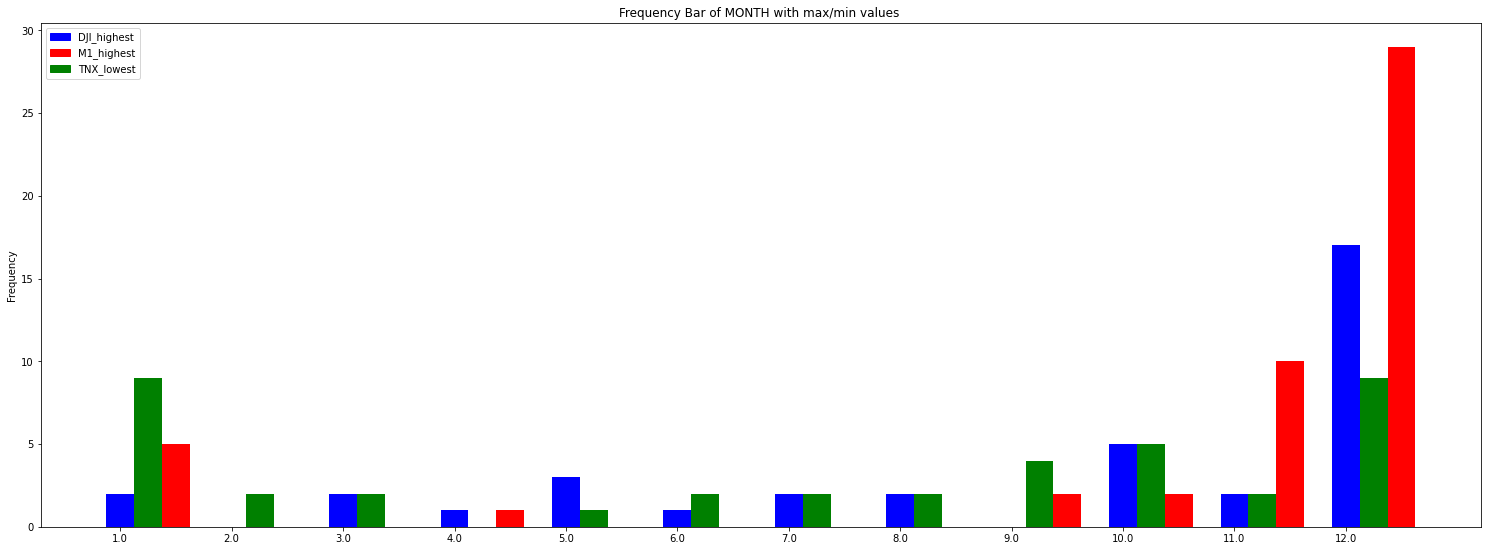

In [64]:
# find out those months when TNX is lowest and DJI is highest
%matplotlib inline


X = np.arange(12)
fig = plt.figure(figsize=(width,height))   
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, list(dfc_month['DJI_highest']), color = 'b', width = 0.25)
ax.bar(X + 0.25, list(dfc_month['TNX_lowest']), color = 'g', width = 0.25)
ax.bar(X + 0.50, list(dfc_month['M1_highest']), color = 'r', width = 0.25)
ax.legend()
colors = {'DJI_highest':'blue','M1_highest':'red', 'TNX_lowest':'green'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
ax1=plt.gca()
ax1.set(title='Frequency Bar of MONTH with max/min values ', ylabel='Frequency')

plt.xticks(range(0,len(dfc_month.index)), dfc_month.index)
plt.savefig('FreqBar_Max_Min_DJI_TNX_M1.png', bbox_inches = 'tight',dpi=100)
plt.show()


<AxesSubplot:ylabel='month_num'>

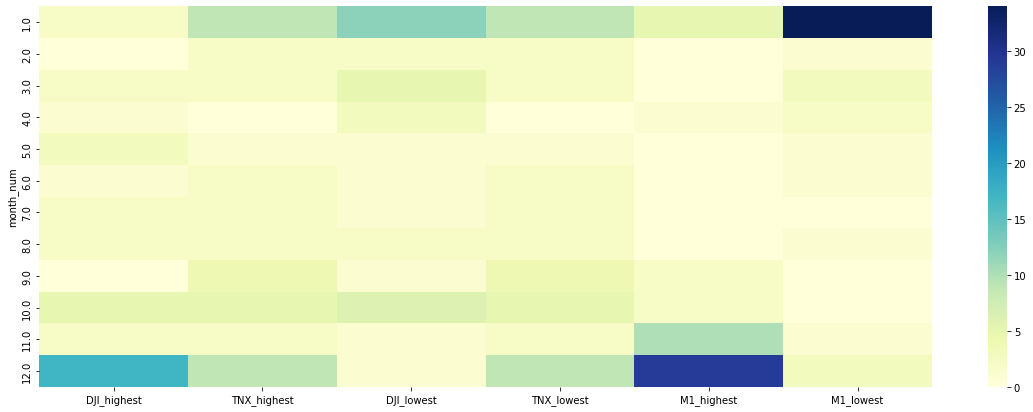

In [65]:
import seaborn as sns
plt.figure(figsize=(width,height))
sns.heatmap(dfc_month, cmap="YlGnBu")

**Calendar effect of MONTH: according to thebar graph and the heat map, December/January is the best trading(buy/sell) month in a year for most indices(DJI/TNX). That's resonable because M1 is most likely to have the max/min value in these two months.**


**Find out the rule of month of calendar effect on the DAYs in a month
get the date of the max/min of DJI/TNX/IXIC/GSPC/M1 each MONTH
get the days of these dates
count the numbers of the max/min in each day in a month
observe whether there are some specific days have most numbers of max/min values in a month.**

In [66]:
dfc

,index,Date,DJI,TNX,IXIC,GSPC,weekday,month,month_num,weekday_num,year
0,0,1985-01-29,100.000000,100.000000,100.000000,100.000000,Tuesday,January,1,1,1985
1,1,1985-01-30,99.633304,99.729973,100.868933,100.117204,Wednesday,January,1,2,1985
2,2,1985-01-31,99.547433,100.540054,100.905141,100.251151,Thursday,January,1,3,1985
3,3,1985-02-01,98.847301,101.620162,100.796518,99.693053,Friday,February,2,4,1985
4,4,1985-02-04,99.803497,102.160216,101.665451,100.652982,Monday,February,2,0,1985
...,...,...,...,...,...,...,...,...,...,...,...
9026,9026,2020-11-20,2263.888891,7.461746,4292.168434,1985.456065,Friday,November,11,4,2020
9027,9027,2020-11-23,2289.247392,7.713771,4301.458857,1996.645958,Monday,November,11,0,2020
9028,9028,2020-11-24,2324.444953,7.938794,4357.997653,2028.915088,Tuesday,November,11,1,2020
9029,9029,2020-11-25,2311.001750,7.902790,4378.855852,2025.700437,Wednesday,November,11,2,2020


In [67]:
#  Find the day of the highest point of m1 each month and count them
dfc['day'] = pd.to_datetime(dfc['Date'])
dfc['day'] = dfc['day'].dt.day

dfc.dropna()



,index,Date,DJI,TNX,IXIC,GSPC,weekday,month,month_num,weekday_num,year,day
0,0,1985-01-29,100.000000,100.000000,100.000000,100.000000,Tuesday,January,1,1,1985,29
1,1,1985-01-30,99.633304,99.729973,100.868933,100.117204,Wednesday,January,1,2,1985,30
2,2,1985-01-31,99.547433,100.540054,100.905141,100.251151,Thursday,January,1,3,1985,31
3,3,1985-02-01,98.847301,101.620162,100.796518,99.693053,Friday,February,2,4,1985,1
4,4,1985-02-04,99.803497,102.160216,101.665451,100.652982,Monday,February,2,0,1985,4
...,...,...,...,...,...,...,...,...,...,...,...,...
9026,9026,2020-11-20,2263.888891,7.461746,4292.168434,1985.456065,Friday,November,11,4,2020,20
9027,9027,2020-11-23,2289.247392,7.713771,4301.458857,1996.645958,Monday,November,11,0,2020,23
9028,9028,2020-11-24,2324.444953,7.938794,4357.997653,2028.915088,Tuesday,November,11,1,2020,24
9029,9029,2020-11-25,2311.001750,7.902790,4378.855852,2025.700437,Wednesday,November,11,2,2020,25


In [68]:
df_dji_highest_day = dfc.groupby('month').apply(lambda t: t[t.DJI==t.DJI.max()])
df_dji_highest_day = df_dji_highest_day.groupby('day').agg({'DJI': [ 'count']})
df_dji_highest_day.columns = df_dji_highest_day.columns.get_level_values(0)
df_dji_highest_day.reset_index(inplace = True) 
df_dji_highest_day
# df_dji_highest_day.drop_duplicates(subset=['day'])
df_dji_highest_day.sort_values("DJI", ascending=False, inplace = True) 

df_tnx_highest_day = dfc.groupby('month').apply(lambda t: t[t.TNX==t.TNX.max()])
df_tnx_highest_day = df_tnx_highest_day.groupby('day').agg({'TNX': [ 'count']})
df_tnx_highest_day.columns = df_tnx_highest_day.columns.get_level_values(0)
df_tnx_highest_day.reset_index(inplace = True) 
df_tnx_highest_day.sort_values("TNX", ascending=False, inplace = True) 


df_ixic_highest_day = dfc.groupby('month').apply(lambda t: t[t.IXIC==t.IXIC.max()])
df_ixic_highest_day = df_ixic_highest_day.groupby('day').agg({'IXIC': [ 'count']})
df_ixic_highest_day.columns = df_ixic_highest_day.columns.get_level_values(0)
df_ixic_highest_day.reset_index(inplace = True) 
df_ixic_highest_day.sort_values("IXIC", ascending=False, inplace = True) 

df_gspc_highest_day = dfc.groupby('month').apply(lambda t: t[t.GSPC==t.GSPC.max()])
df_gspc_highest_day = df_gspc_highest_day.groupby('day').agg({'GSPC': [ 'count']})
df_gspc_highest_day.columns = df_gspc_highest_day.columns.get_level_values(0)
df_gspc_highest_day.reset_index(inplace = True) 
df_gspc_highest_day.sort_values("GSPC", ascending=False, inplace = True) 

df_dji_lowest_day = dfc.groupby('month').apply(lambda t: t[t.DJI==t.DJI.min()])
df_dji_lowest_day = df_dji_lowest_day.groupby('day').agg({'DJI': [ 'count']})
df_dji_lowest_day.columns = df_dji_lowest_day.columns.get_level_values(0)
df_dji_lowest_day.reset_index(inplace = True) 
df_dji_lowest_day.sort_values("DJI", ascending=False, inplace = True) 

df_tnx_lowest_day = dfc.groupby('month').apply(lambda t: t[t.TNX==t.TNX.min()])
df_tnx_lowest_day = df_tnx_lowest_day.groupby('day').agg({'TNX': [ 'count']})
df_tnx_lowest_day.columns = df_tnx_lowest_day.columns.get_level_values(0)
df_tnx_lowest_day.reset_index(inplace = True) 
df_tnx_lowest_day.sort_values("TNX", ascending=False, inplace = True) 


df_ixic_lowest_day = dfc.groupby('month').apply(lambda t: t[t.IXIC==t.IXIC.min()])
df_ixic_lowest_day = df_ixic_lowest_day.groupby('day').agg({'IXIC': [ 'count']})
df_ixic_lowest_day.columns = df_ixic_lowest_day.columns.get_level_values(0)
df_ixic_lowest_day.reset_index(inplace = True) 
df_ixic_lowest_day.sort_values("IXIC", ascending=False, inplace = True) 

df_gspc_lowest_day = dfc.groupby('month').apply(lambda t: t[t.GSPC==t.GSPC.min()])
df_gspc_lowest_day = df_gspc_lowest_day.groupby('day').agg({'GSPC': [ 'count']})
df_gspc_lowest_day.columns = df_gspc_lowest_day.columns.get_level_values(0)
df_gspc_lowest_day.reset_index(inplace = True) 
df_gspc_lowest_day.sort_values("GSPC", ascending=False, inplace = True) 

df_gspc_lowest_day

,day,GSPC
0,1,2
4,8,2
9,29,2
1,2,1
2,4,1
3,7,1
5,13,1
6,15,1
7,16,1
8,25,1


In [69]:
df_day = pd.merge(df_dji_highest_day,df_tnx_highest_day,how="outer",on="day")
df_day = pd.merge(df_day,df_dji_lowest_day,how="outer",on="day")
df_day = pd.merge(df_day,df_tnx_lowest_day,how="outer",on="day")
df_day

,day,DJI_x,TNX_x,DJI_y,TNX_y
0,12,2.0,1.0,NaN,NaN
1,2,1.0,3.0,1.0,NaN
2,3,1.0,NaN,NaN,1.0
3,4,1.0,1.0,1.0,2.0
4,8,1.0,1.0,1.0,NaN
5,15,1.0,NaN,1.0,NaN
6,17,1.0,NaN,NaN,NaN
7,23,1.0,NaN,NaN,NaN
8,24,1.0,NaN,NaN,NaN
9,27,1.0,NaN,NaN,NaN


In [70]:

df_m1['day'] = pd.to_datetime(df_m1['Date'])
df_m1['day'] = df_m1['day'].dt.day

df_m1.dropna()


,Date,M1,month,year,day
0,1975-01-06,273.4,January,1975,6
1,1975-01-13,273.7,January,1975,13
2,1975-01-20,273.8,January,1975,20
3,1975-01-27,273.7,January,1975,27
4,1975-02-03,275.2,February,1975,3
...,...,...,...,...,...
2391,2020-11-02,5635.4,November,2020,2
2392,2020-11-09,5735.4,November,2020,9
2393,2020-11-16,5733.4,November,2020,16
2394,2020-11-23,6231.2,November,2020,23


In [71]:
#  Find the day of the lowest point of m1 each year and count them

df_m1_highest_day = df_m1.groupby('month').apply(lambda t: t[t.M1==t.M1.min()])
df_m1_highest_day.drop_duplicates(subset=['month'])
df_m1_highest_day = df_m1_highest_day.groupby('day').agg({'M1': [ 'count']})
df_m1_highest_day.columns = df_m1_highest_day.columns.get_level_values(0)
df_m1_highest_day.reset_index(inplace = True) 
df_m1_highest_day.sort_values("M1", ascending=False, inplace = True) 
df_m1_highest_day

df_m1_lowest_day = df_m1.groupby('month').apply(lambda t: t[t.M1==t.M1.min()])
df_m1_lowest_day.drop_duplicates(subset=['month'])
df_m1_lowest_day = df_m1_lowest_day.groupby('day').agg({'M1': [ 'count']})
df_m1_lowest_day.columns = df_m1_lowest_day.columns.get_level_values(0)
df_m1_lowest_day.reset_index(inplace = True) 
df_m1_lowest_day.sort_values("M1", ascending=False, inplace = True) 
df_m1_lowest_day

,day,M1
4,6,2
5,7,2
0,1,1
1,2,1
2,3,1
3,5,1
6,8,1
7,11,1
8,24,1
9,31,1


In [72]:
#  Find the day of the highest point of m1 each month and count them
df_day = pd.merge(df_day,df_m1_highest_day,how="outer",on="day")
df_day = pd.merge(df_day,df_m1_lowest_day,how="outer",on="day")

df_day = df_day.rename(columns={'DJI_x':'DJI_highest','TNX_x':'TNX_highest','M1_x':'M1_highest','DJI_y':'DJI_lowest','TNX_y':'TNX_lowest','M1_y':'M1_lowest'})
df_day=df_day.set_index('day')
df_day


,DJI_highest,TNX_highest,DJI_lowest,TNX_lowest,M1_highest,M1_lowest
day,,,,,,
12,2.0,1.0,NaN,NaN,NaN,NaN
2,1.0,3.0,1.0,NaN,1.0,1.0
3,1.0,NaN,NaN,1.0,1.0,1.0
4,1.0,1.0,1.0,2.0,NaN,NaN
8,1.0,1.0,1.0,NaN,1.0,1.0
15,1.0,NaN,1.0,NaN,NaN,NaN
17,1.0,NaN,NaN,NaN,NaN,NaN
23,1.0,NaN,NaN,NaN,NaN,NaN
24,1.0,NaN,NaN,NaN,1.0,1.0


<AxesSubplot:ylabel='day'>

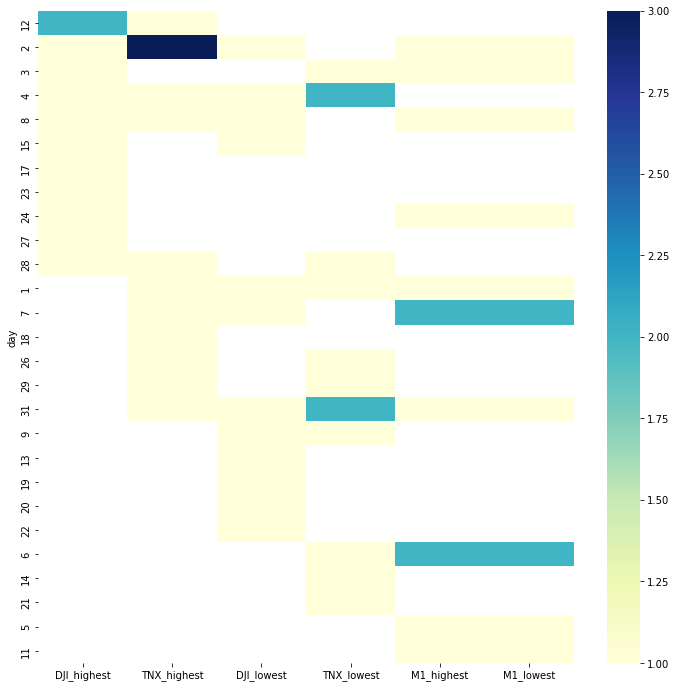

In [73]:
plt.figure(figsize=(12,12))
sns.heatmap(df_day, cmap="YlGnBu")
plt.savefig('HeatMap_DJI_TNX_M1.png', bbox_inches = 'tight',dpi=100)


**Calendar effect of DAYs: according to the heat map, the beginning and the end of a month is the best trading(buy/sell) day in a month for most indices(DJI/TNX). That's resonable because M1 is most likely to has the max/min value in 6th or 7th of a month. In addition, the highest DJI(4th) is always near the highest TNX(2nd) or the lowest TNX(4th or 31st).**

**Next, analyze the calendar effect of growth rate monthly**

In [74]:
dfc['Date'] = pd.to_datetime(dfc['Date'])

In [75]:
cur.execute('DROP TABLE IF EXISTS dfc')
dfc.to_sql('dfc', conn) 

In [76]:
df_m1['month_num'] = df_m1['Date'].dt.month
df_m1

,Date,M1,month,year,day,month_num
0,1975-01-06,273.4,January,1975,6,1
1,1975-01-13,273.7,January,1975,13,1
2,1975-01-20,273.8,January,1975,20,1
3,1975-01-27,273.7,January,1975,27,1
4,1975-02-03,275.2,February,1975,3,2
...,...,...,...,...,...,...
2391,2020-11-02,5635.4,November,2020,2,11
2392,2020-11-09,5735.4,November,2020,9,11
2393,2020-11-16,5733.4,November,2020,16,11
2394,2020-11-23,6231.2,November,2020,23,11


In [77]:
dfcm = pd.merge(dfc,df_m1,how='inner',on='Date')[['Date','DJI','TNX','IXIC','GSPC','M1']]
dfcm['month_num'] = dfcm['Date'].dt.month
dfcm['year'] = dfcm['Date'].dt.year
dfcm['weekday'] = dfcm['Date'].dt.weekday
dfcm

,Date,DJI,TNX,IXIC,GSPC,M1,month_num,year,weekday
0,1985-02-04,99.803497,102.160216,101.665451,100.652982,561.4,2,1985,0
1,1985-02-11,98.718886,102.790279,104.055026,100.742271,562.4,2,1985,0
2,1985-02-25,98.830283,105.760576,102.824036,100.027907,564.9,2,1985,0
3,1985-03-04,99.760953,107.380738,103.946413,101.607325,565.7,3,1985,0
4,1985-03-11,98.137895,105.490549,101.810282,99.782342,565.6,3,1985,0
...,...,...,...,...,...,...,...,...,...
1666,2020-11-02,2082.982693,7.641764,3967.273669,1847.438397,5635.4,11,2020,0
1667,2020-11-09,2255.726417,8.622862,4241.049877,1981.527034,5735.4,11,2020,0
1668,2020-11-16,2317.033588,8.154815,4317.208314,2024.171254,5733.4,11,2020,0
1669,2020-11-23,2289.247392,7.713771,4301.458857,1996.645958,6231.2,11,2020,0


In [78]:
# calculate the growth rate of each month for DJI,IXIC,GSPC,TNX
# by SQL way now

dfg = pd.read_sql_query('''
with data1 as
(select D1.year,D1.month_num,D1.date,D1.DJI,D1.TNX,D1.IXIC,D1.GSPC from dfc D1
group by D1.year,D1.month_num
having D1.date= min(D1.date))
, data2 as
(select D2.year,D2.month_num,D2.date,D2.DJI,D2.TNX,D2.IXIC,D2.GSPC from dfc D2
group by D2.year,D2.month_num
having D2.date= max(D2.date))
select data2.DJI/data1.DJI-1 as DJIgrowth,data2.IXIC/data1.IXIC-1 as IXICgrowth,data2.GSPC/data1.GSPC-1 as GSPCgrowth,data2.TNX/data1.TNX-1 as TNXgrowth, data1.date as date1,data2.date as date2,data1.month_num,data1.year from data1,data2
where data1.month_num=data2.month_num and data1.year=data2.year
''',conn)
dfg

,DJIgrowth,IXICgrowth,GSPCgrowth,TNXgrowth,date1,date2,month_num,year
0,-0.004526,0.009051,0.002512,0.005401,1985-01-29 00:00:00,1985-01-31 00:00:00,1,1985
1,0.004923,0.020833,0.014275,0.054916,1985-02-01 00:00:00,1985-02-28 00:00:00,2,1985
2,-0.025074,-0.027855,-0.014026,-0.017707,1985-03-01 00:00:00,1985-03-29 00:00:00,3,1985
3,-0.011542,0.001070,-0.007944,-0.021441,1985-04-01 00:00:00,1985-04-30 00:00:00,4,1985
4,0.059064,0.040057,0.062679,-0.087844,1985-05-01 00:00:00,1985-05-31 00:00:00,5,1985
...,...,...,...,...,...,...,...,...
426,0.026942,0.058165,0.049829,-0.214076,2020-07-01 00:00:00,2020-07-31 00:00:00,7,2020
427,0.066218,0.080040,0.062435,0.230906,2020-08-03 00:00:00,2020-08-31 00:00:00,8,2020
428,-0.030160,-0.064672,-0.046404,0.007440,2020-09-01 00:00:00,2020-09-30 00:00:00,9,2020
429,-0.047284,-0.036633,-0.032785,0.270310,2020-10-01 00:00:00,2020-10-30 00:00:00,10,2020


In [79]:
# calculate the growth rate of each month M1
# by SQL way 

cur.execute('DROP TABLE IF EXISTS df_m1')
df_m1.to_sql('df_m1', conn) 

dfgm = pd.read_sql_query('''
with data1 as
(select D1.year,D1.month_num,D1.date,D1.M1 from df_m1 D1
group by D1.year,D1.month_num
having D1.date= min(D1.date))
, data2 as
(select D2.year,D2.month_num,D2.date,D2.M1 from df_m1 D2
group by D2.year,D2.month_num
having D2.date= max(D2.date))
select data2.M1/data1.M1-1 as M1growth, data1.date as date1,data2.date as date2,data1.month_num,data1.year from data1,data2
where data1.month_num=data2.month_num and data1.year=data2.year
''',conn)
dfgm

,M1growth,date1,date2,month_num,year
0,0.001097,1975-01-06 00:00:00,1975-01-27 00:00:00,1,1975
1,-0.003634,1975-02-03 00:00:00,1975-02-24 00:00:00,2,1975
2,-0.007262,1975-03-03 00:00:00,1975-03-31 00:00:00,3,1975
3,0.005814,1975-04-07 00:00:00,1975-04-28 00:00:00,4,1975
4,0.010815,1975-05-05 00:00:00,1975-05-26 00:00:00,5,1975
...,...,...,...,...,...
546,0.030102,2020-07-06 00:00:00,2020-07-27 00:00:00,7,2020
547,-0.014557,2020-08-03 00:00:00,2020-08-31 00:00:00,8,2020
548,0.019612,2020-09-07 00:00:00,2020-09-28 00:00:00,9,2020
549,0.013272,2020-10-05 00:00:00,2020-10-26 00:00:00,10,2020


In [80]:
dfcg = pd.merge(dfg,dfgm,how='inner',on=['year','month_num'])[['DJIgrowth','IXICgrowth','GSPCgrowth','TNXgrowth','M1growth','month_num','year']]
dfcg

,DJIgrowth,IXICgrowth,GSPCgrowth,TNXgrowth,M1growth,month_num,year
0,-0.004526,0.009051,0.002512,0.005401,0.008664,1,1985
1,0.004923,0.020833,0.014275,0.054916,0.006234,2,1985
2,-0.025074,-0.027855,-0.014026,-0.017707,0.003359,3,1985
3,-0.011542,0.001070,-0.007944,-0.021441,0.002637,4,1985
4,0.059064,0.040057,0.062679,-0.087844,0.009092,5,1985
...,...,...,...,...,...,...,...
426,0.026942,0.058165,0.049829,-0.214076,0.030102,7,2020
427,0.066218,0.080040,0.062435,0.230906,-0.014557,8,2020
428,-0.030160,-0.064672,-0.046404,0.007440,0.019612,9,2020
429,-0.047284,-0.036633,-0.032785,0.270310,0.013272,10,2020


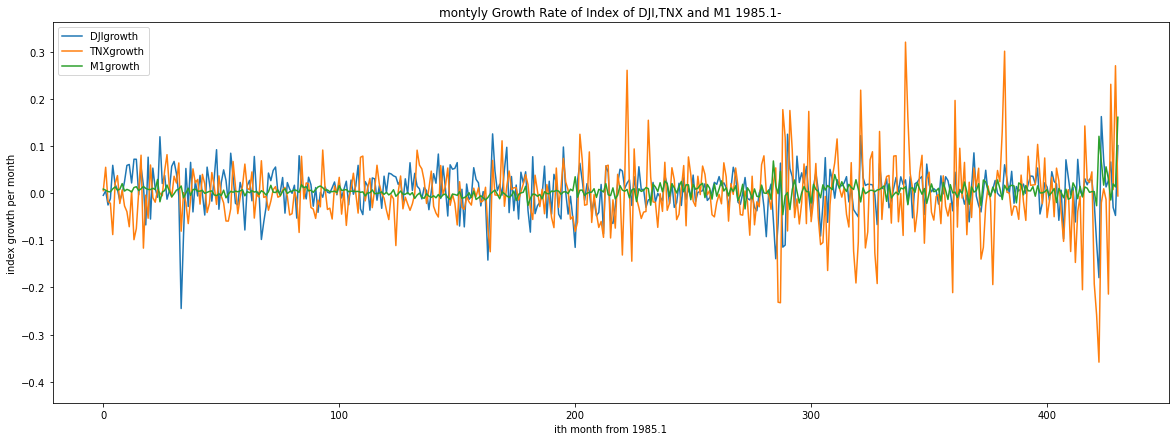

In [81]:
# draw graph of the monthly growth of the indeces
plt.figure(figsize=(width,height))
plt.ylim(min(dfcg['DJIgrowth'].min(),dfcg['M1growth'].min())-0.2, max(dfcg['DJIgrowth'].max(),dfcg['M1growth'].max())+0.2)
plt.plot(dfcg.index, 'DJIgrowth',data=dfcg)
plt.plot(dfcg.index, 'TNXgrowth',data=dfcg)
plt.plot(dfcg.index, 'M1growth',data=dfcg)
plt.legend()
plt.xlabel("ith month from 1985.1")
plt.ylabel("index growth per month")
plt.title("montyly Growth Rate of Index of DJI,TNX and M1 1985.1-")
plt.savefig('GrowthRate of Index of DJI,TNX and M1.png', bbox_inches = 'tight',dpi=100)
plt.show()

In [82]:
# combine max growth rate monthly of DJI/IXIC/GSPC/TNX/M1 together
# find out in which month both M1 and DJI get the highest monthly growth in a year(12 months, including itself) after each month
# first, get all max growths in any 12 months for DJI

In [83]:
#dfcg['date']=dfcg['year'].astype(str)+'-'+ dfcg['month_num'].astype(str)
dfcg['monthNo']=(dfcg['year']-1985)*12+dfcg['month_num']
dfcg

,DJIgrowth,IXICgrowth,GSPCgrowth,TNXgrowth,M1growth,month_num,year,monthNo
0,-0.004526,0.009051,0.002512,0.005401,0.008664,1,1985,1
1,0.004923,0.020833,0.014275,0.054916,0.006234,2,1985,2
2,-0.025074,-0.027855,-0.014026,-0.017707,0.003359,3,1985,3
3,-0.011542,0.001070,-0.007944,-0.021441,0.002637,4,1985,4
4,0.059064,0.040057,0.062679,-0.087844,0.009092,5,1985,5
...,...,...,...,...,...,...,...,...
426,0.026942,0.058165,0.049829,-0.214076,0.030102,7,2020,427
427,0.066218,0.080040,0.062435,0.230906,-0.014557,8,2020,428
428,-0.030160,-0.064672,-0.046404,0.007440,0.019612,9,2020,429
429,-0.047284,-0.036633,-0.032785,0.270310,0.013272,10,2020,430


In [84]:
cur.execute('DROP TABLE IF EXISTS dfcg')
dfcg.to_sql('dfcg', conn) 

In [85]:
# calculate the count of the calendar month which get the highest growth of M1
dfg_m1_highest_month = dfcg.groupby('year').apply(lambda t: t[t.M1growth==t.M1growth.max()])

# .drop_duplicates(subset=['year'])

dfg_m1_highest_month = dfg_m1_highest_month.groupby('month_num').agg({'M1growth': [ 'count']})

dfg_m1_highest_month.columns = dfg_m1_highest_month.columns.get_level_values(0)
dfg_m1_highest_month.reset_index(inplace = True) 
dfg_m1_highest_month.sort_values("M1growth", ascending=False, inplace = True) 
dfg_m1_highest_month

,month_num,M1growth
9,11,6
2,4,4
4,6,4
6,8,4
7,9,4
10,12,4
0,1,3
8,10,3
3,5,2
1,3,1


In [86]:
# calculate the count of the calendar month which get the highest growth of DJI
dfg_dji_highest_month = dfcg.groupby('year').apply(lambda t: t[t.DJIgrowth==t.DJIgrowth.max()])

# .drop_duplicates(subset=['year'])

dfg_dji_highest_month = dfg_dji_highest_month.groupby('month_num').agg({'DJIgrowth': [ 'count']})

dfg_dji_highest_month.columns = dfg_dji_highest_month.columns.get_level_values(0)
dfg_dji_highest_month.reset_index(inplace = True) 
dfg_dji_highest_month.sort_values("DJIgrowth", ascending=False, inplace = True) 
dfg_dji_highest_month

,month_num,DJIgrowth
8,10,6
3,4,5
9,11,5
10,12,5
0,1,4
1,2,3
2,3,2
5,6,2
6,7,2
4,5,1


In [87]:
# calculate the count of the calendar month which get the highest growth of IXIC
dfg_ixic_highest_month = dfcg.groupby('year').apply(lambda t: t[t.IXICgrowth==t.IXICgrowth.max()])

dfg_ixic_highest_month = dfg_ixic_highest_month.groupby('month_num').agg({'IXICgrowth': [ 'count']})

dfg_ixic_highest_month.columns = dfg_ixic_highest_month.columns.get_level_values(0)
dfg_ixic_highest_month.reset_index(inplace = True) 
dfg_ixic_highest_month.sort_values("IXICgrowth", ascending=False, inplace = True) 
dfg_ixic_highest_month

,month_num,IXICgrowth
0,1,7
9,10,5
1,2,4
3,4,3
4,5,3
6,7,3
10,11,3
5,6,2
7,8,2
11,12,2


In [88]:
# calculate the count of the calendar month which get the highest growth of IXIC
dfg_gspc_highest_month = dfcg.groupby('year').apply(lambda t: t[t.GSPCgrowth==t.GSPCgrowth.max()])

dfg_gspc_highest_month = dfg_gspc_highest_month.groupby('month_num').agg({'GSPCgrowth': [ 'count']})

dfg_gspc_highest_month.columns = dfg_gspc_highest_month.columns.get_level_values(0)
dfg_gspc_highest_month.reset_index(inplace = True) 
dfg_gspc_highest_month.sort_values("GSPCgrowth", ascending=False, inplace = True) 
dfg_gspc_highest_month

,month_num,GSPCgrowth
9,10,6
6,7,5
0,1,4
3,4,4
10,11,4
4,5,3
1,2,2
2,3,2
7,8,2
11,12,2


In [89]:
# calculate the count of the calendar month which get the highest growth of TNX
dfg_tnx_highest_month = dfcg.groupby('year').apply(lambda t: t[t.TNXgrowth==t.TNXgrowth.max()])

# .drop_duplicates(subset=['year'])

dfg_tnx_highest_month = dfg_tnx_highest_month.groupby('month_num').agg({'TNXgrowth': [ 'count']})

dfg_tnx_highest_month.columns = dfg_tnx_highest_month.columns.get_level_values(0)
dfg_tnx_highest_month.reset_index(inplace = True) 
dfg_tnx_highest_month.sort_values("TNXgrowth", ascending=False, inplace = True) 
dfg_tnx_highest_month

,month_num,TNXgrowth
1,2,5
2,3,5
4,5,4
9,10,4
3,4,3
8,9,3
10,11,3
0,1,2
6,7,2
7,8,2


In [90]:
dfg_highest_month = pd.merge(dfg_dji_highest_month,dfg_tnx_highest_month,how='inner',on='month_num')
dfg_highest_month = pd.merge(dfg_highest_month,dfg_ixic_highest_month,how='inner',on='month_num')
dfg_highest_month = pd.merge(dfg_highest_month,dfg_gspc_highest_month,how='inner',on='month_num')
dfg_highest_month = pd.merge(dfg_highest_month,dfg_m1_highest_month,how='inner',on='month_num')
dfg_highest_month = dfg_highest_month.sort_values(by='month_num')
dfg_highest_month = dfg_highest_month.set_index('month_num')
dfg_highest_month 

,DJIgrowth,TNXgrowth,IXICgrowth,GSPCgrowth,M1growth
month_num,,,,,
1,4,2,7,4,3
3,2,5,1,2,1
4,5,3,3,4,4
5,1,4,3,3,2
6,2,1,2,1,4
7,2,2,3,5,1
8,1,2,2,2,4
10,6,4,5,6,3
11,5,3,3,4,6


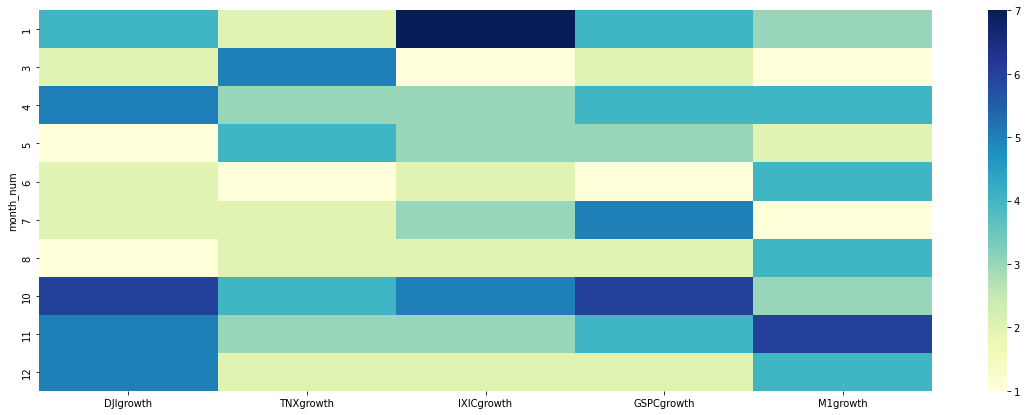

In [91]:

plt.figure(figsize=(width,height))
sns.heatmap(dfg_highest_month, cmap="YlGnBu")
plt.savefig('HeatMap.png', bbox_inches = 'tight',dpi=200)

**From the heat map, it is shown that DJI/GSPC and M1 mostly get the highest growth rate in the last season(winter). In contrast, TNX/IXIC is more likely to get the highest growth rate in the first season(spring).**

Conclusion:
There is Calendar Effect in stock market. 

1.Calendar effect of MONTH: according to the bar graph and the heat map, December/January is the best trading(buy/sell) month in a year for most indices(DJI/TNX). That make sense because M1 is the most likely to have the max/min value in these two months.
DJI/GSPC and M1 mostly get the highest growth rate in the last season(winter). In contrast, TNX/IXIC is more likely to get the highest growth rate in the first season(spring).


2.Calendar effect of DAYs: according to the heat map, the beginning and the end of a month is the best trading(buy/sell) day in a month for most indices(DJI/TNX). That's resonable because M1 is most likely to has the max/min value in 6th or 7th of a month. In addition, the highest DJI(4th) is always near the highest TNX(2nd) or the lowest TNX(4th or 31st). 



